In [1]:
import numpy as np
import json
import pandas as pd

In [2]:
def make_dict_from_jsonl(file_path):
    log_list = []
    with open(file_path) as in_file:
        for line in in_file:
            log_list.append(json.loads(line))
    
    out_dict = {key:[] for key in log_list[0].keys()}
    for log_item in log_list:
        for key, value in log_item.items():
            out_dict[key].append(value)
    return out_dict

In [3]:
train_log_file_path = './data_and_plots/st2/training_metrics_log.jsonl'
dev_log_file_path = './data_and_plots/st2/dev_metrics_log.jsonl'
epoch_log_file_path = './data_and_plots/st2/epoch_logs.jsonl'

In [4]:
training_log_dict = make_dict_from_jsonl(train_log_file_path)

In [5]:
dev_log_dict = make_dict_from_jsonl(dev_log_file_path)

In [10]:
epoch_log_dict = make_dict_from_jsonl(epoch_log_file_path)

In [11]:
training_log_dict.keys()

dict_keys(['training_loss'])

In [12]:
dev_log_dict.keys()

dict_keys(['classification_accuracy'])

In [13]:
epoch_log_dict.keys()

dict_keys(['classification_accuracy', 'loss', 'dev_classification_accuracy'])

In [14]:
training_df = pd.DataFrame(data=training_log_dict)

In [15]:
training_df.describe()

,training_loss
count,6734.000000
mean,0.433457
std,0.055177
min,0.313455
25%,0.396453
50%,0.422772
75%,0.457730
max,0.768089


In [16]:
dev_df = pd.DataFrame(data=dev_log_dict)

In [17]:
dev_df.describe()

,classification_accuracy
count,49.000000
mean,0.761849
std,0.024357
min,0.657000
25%,0.758000
50%,0.767200
75%,0.775000
max,0.788800


In [19]:
epoch_logs_df = pd.DataFrame(data=epoch_log_dict)

In [20]:
epoch_logs_df.describe()

,classification_accuracy,loss,dev_classification_accuracy
count,49.000000,49.000000,49.000000
mean,0.863516,0.448644,0.761849
std,0.066017,0.065439,0.024357
min,0.667500,0.375426,0.657000
25%,0.808500,0.396990,0.758000
50%,0.887444,0.423198,0.767200
75%,0.913956,0.506343,0.775000
max,0.937010,0.633085,0.788800


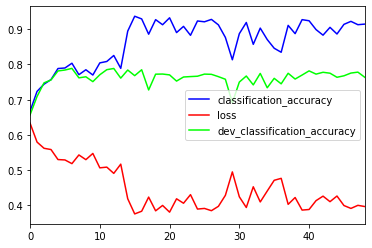

In [24]:
epoch_logs_df.plot(colormap="brg")

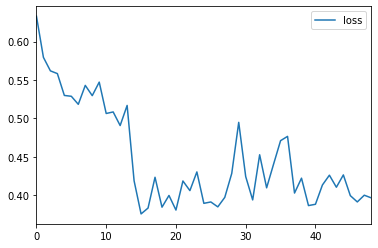

In [25]:
# training set loss
epoch_logs_df.plot(y="loss")

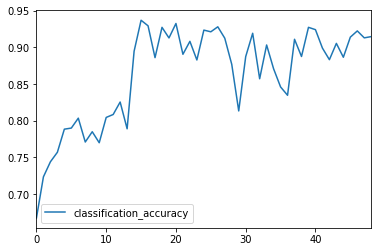

In [26]:
# training set acc
epoch_logs_df.plot(y="classification_accuracy")

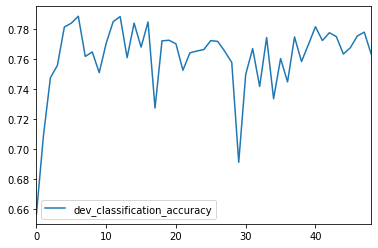

In [27]:
# dev set acc
epoch_logs_df.plot(y="dev_classification_accuracy")

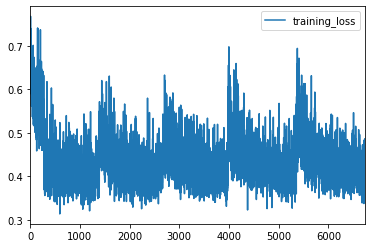

In [28]:
training_df.plot(y="training_loss")

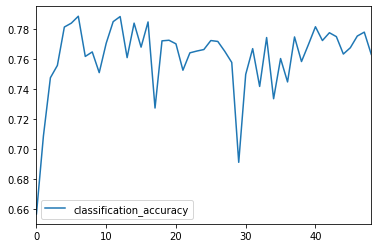

In [29]:
dev_df.plot(y="classification_accuracy")